# Exercise 2
Implement the standard brute-force factoring algorithm as efficiently as possible.  
Try only odd numbers (and 2) up to $\sqrt{a}$ (where a is the number you wish to factor).

In [ ]:
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
        factors = {}
    return primes

def factorize(a, primes):
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors

In [ ]:
# Given
a = 978460745

In [ ]:
primes = get_primes1(a)
factors = factorize(a, primes)
factors

# Exercise 3
Make improvements to your brute-force algorithm. For example, skipping  
multiples of 3, 5, 7, .... Discuss the speed improvements in doing so.

In [ ]:
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    return primes

def get_primes2(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def factorize(a, primes):
    factors = {}
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors

In [ ]:
# Given
a = 978460745

In [ ]:
primes1 = get_primes1(a)

In [ ]:
factors = factorize(a, primes1)
factors

In [ ]:
primes2 = get_primes2(a)

In [ ]:
factors = factorize(a, primes2)
factors

In [ ]:
import timeit

In [ ]:
setup1 = """
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    return primes

def get_primes2(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def factorize(a, primes):
    factors = {}
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors
a = 978460745
primes1 = get_primes1(a)
"""
code1 = """
factorize(a, primes1)
"""
print(timeit.timeit(setup=setup1,
                   stmt=code1,
                   number=1000))

In [ ]:
setup2 = """
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    return primes

def get_primes2(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def factorize(a, primes):
    factors = {}
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors
a = 978460745
primes2 = get_primes2(a)
"""
code2 = """
factorize(a, primes2)
"""
print(timeit.timeit(setup=setup2,
                   stmt=code2,
                   number=1000))

# Exercise 4
Implement Fermat’s difference of squares method. Discuss its  
performance (running times) with inputs of integers varying  
in size from small numbers (< 100) up through numbers in the  
billions and further.

In [ ]:
import math
def check_square(num):
    num = int(num)
    root = math.sqrt(num)
    if int(root + 0.5) ** 2 == num:
        return True
    else:
        return False
    return None

def factorize_fermat(a):
    x = math.ceil(math.sqrt(a))
    t = 2 * x + 1
    d = x ** 2 - a
    while not(check_square(d)):
        d += t
        t += 2
    x = math.sqrt(d + a)
    y = math.sqrt(d)
    return x, y

In [ ]:
a = 978460745

In [ ]:
x, y = factorize_fermat(a)

In [ ]:
setup = """
import math
def check_square(num):
    num = int(num)
    root = math.sqrt(num)
    if int(root + 0.5) ** 2 == num:
        return True
    else:
        return False
    return None

def factorize_fermat(a):
    x = math.ceil(math.sqrt(a))
    t = 2 * x + 1
    d = x ** 2 - a
    while not(check_square(d)):
        d += t
        t += 2
    x = math.sqrt(d + a)
    y = math.sqrt(d)
    return x, y
from __main__ import a
"""
code = """
x, y = factorize_fermat(a)
"""
A, Time = [], []
a0 = 50
for i in range(10):
    a0 = a0 * 10
    A.append(a0)
for a in A:
    t = timeit.timeit(setup=setup, stmt=code, number=1000)
    print(a, t)
    Time.append(t)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
Time

In [ ]:
plt.plot(A, Time)

# Exercise 5
Implement Pollard's p-1 factorization algorithm

In [ ]:
from pollard import pollard_pm1
import math

In [ ]:
# Given
a = 100
B = math.ceil(math.sqrt(a))

In [ ]:
factor = pollard_pm1(a, B)
factor

# Exercise 6
Building on the elliptic curve point addition used in the previous chapter,  
implement elliptic curve factorization (ECF).  
Next, provide a chart to compare the performance of Pollard’s p – 1 and ECF for  
the same inputs (with the same, or similar, parameters).

In [30]:
import timeit
import math
from lenstra import lenstra, primes
from pollard import pollard_pm1
import matplotlib.pyplot as plt

In [45]:
setup = """
import timeit
import math
from lenstra import lenstra
from pollard import pollard_pm1
from __main__ import n
"""
code1 = """
B = math.ceil(math.sqrt(n))
factor = pollard_pm1(n, B)
"""
code2 = """
B = math.ceil(math.sqrt(n))
factor = lenstra(n, B)
"""
N = []
prime_list = primes(5000)
for i in range(len(prime_list)-1):
    n0 = prime_list[i] * prime_list[i + 1]
    N.append(n0)
N

[6,
 15,
 35,
 77,
 143,
 221,
 323,
 437,
 667,
 899,
 1147,
 1517,
 1763,
 2021,
 2491,
 3127,
 3599,
 4087,
 4757,
 5183,
 5767,
 6557,
 7387,
 8633,
 9797,
 10403,
 11021,
 11663,
 12317,
 14351,
 16637,
 17947,
 19043,
 20711,
 22499,
 23707,
 25591,
 27221,
 28891,
 30967,
 32399,
 34571,
 36863,
 38021,
 39203,
 41989,
 47053,
 50621,
 51983,
 53357,
 55687,
 57599,
 60491,
 64507,
 67591,
 70747,
 72899,
 75067,
 77837,
 79523,
 82919,
 89951,
 95477,
 97343,
 99221,
 104927,
 111547,
 116939,
 121103,
 123197,
 126727,
 131753,
 136891,
 141367,
 145157,
 148987,
 154433,
 159197,
 164009,
 171371,
 176399,
 181451,
 186623,
 190087,
 194477,
 198907,
 205193,
 210677,
 213443,
 216221,
 223693,
 233273,
 239117,
 245009,
 250997,
 256027,
 265189,
 272483,
 282943,
 295927,
 304679,
 313591,
 320347,
 324899,
 329467,
 338699,
 348091,
 355207,
 359999,
 364807,
 372091,
 378221,
 381923,
 390589,
 404471,
 412163,
 416021,
 422491,
 430327,
 435599,
 444853,
 455621,
 462391

In [46]:
Time1 = []
for n in N:
    t = timeit.timeit(setup=setup, stmt=code1, number=100)
    print(n, t)
    Time1.append(t)

6 0.0002581999999620166
15 0.0003325000000131695
35 0.00043619999996735714
77 0.0006604999998671701
143 0.000755600000047707
221 0.0007841000001462817
323 0.0008313000000725879
437 0.0013285999998515763
667 0.0018506000001252687
899 0.0016895999999633204
1147 0.0016517999999905442
1517 0.0016413999999258522
1763 0.0020081000000118365
2021 0.0026373000000603497
2491 0.003284899999925983
3127 0.003477400000065245
3599 0.002607399999988047
4087 0.00302800000008574
4757 0.0030626000000211206
5183 0.0021728000001530745
5767 0.0023091000000476924
6557 0.00357809999991332
7387 0.0036330000000361906
8633 0.0023272999999335298
9797 0.002409700000043813
10403 0.0033802999998897576
11021 0.0042568999999730295
11663 0.0029386999999587715
12317 0.0027755000000979635
14351 0.007591300000058254
16637 0.004267499999969004
17947 0.005191199999899254
19043 0.006325599999854603
20711 0.0063602000000173575
22499 0.0043697000000975095
23707 0.004142000000001644
25591 0.00381070000003092
27221 0.00383459999

3980021 0.044703000000026805
3992003 0.039948399999957473
4003997 0.03689980000012838
4028033 0.03743439999993825
4056187 0.03584309999996549
4088459 0.0356835999998566
4112783 0.038621600000169565
4137131 0.03797080000003916
4186067 0.056780399999979636
4235339 0.03857689999995273
4268347 0.04356809999990219
4305589 0.037251900000001115
4334723 0.03954259999977694
4347221 0.05348920000005819
4359743 0.04072309999992285
4384811 0.040455900000097245
4430989 0.05496319999997468
4460543 0.041572399999949994
4498577 0.03867239999999583
4536899 0.05801530000007915
4553947 0.04884399999991729
4575317 0.06244390000006206
4588163 0.06430420000015147
4613879 0.042834999999968204
4652633 0.03778839999995398
4708819 0.03656840000007833
4800337 0.043280900000127076
4862021 0.0661001999999371
4884091 0.050324000000046
4915073 0.04395569999996951
4968377 0.04774330000009286
5008643 0.04878680000001623
5022077 0.05061660000001211
5048993 0.03999959999987368
5103017 0.040718299999980445
5143823 0.0431

18429833 0.08598129999995763
18593119 0.08292099999994207
18766199 0.0835784999999305
18818243 0.09641050000004725
18870311 0.09178620000011506
18948593 0.07297289999996792
19009591 0.07621760000006361
19079399 0.12474760000009155
19201843 0.10552550000011252
19307227 0.08790670000007594
19386373 0.07616799999982504
19492189 0.07460889999993014
19554083 0.07631670000000668
19642543 0.07656429999997272
19749127 0.07465520000005199
19793597 0.07519050000018979
19838107 0.08499830000005204
19891591 0.08403010000006361
19998703 0.07208729999979369
20088323 0.07323070000006737
20142119 0.15107899999998153
20249951 0.12398439999992661
20340091 0.08081589999983407
20385221 0.08196210000005522
20412323 0.09564230000000862
20439437 0.07601390000013453
20566081 0.07721839999999247
20684303 0.10398639999993975
20747989 0.0776639000000614
20830087 0.07769029999985833
20930561 0.08632160000001932
21040553 0.0772001000000273
21104827 0.08223450000014054
21159991 0.0865592000000106
21270463 0.0774679

In [47]:
Time2 = []
for n in N:
    t = timeit.timeit(setup=setup, stmt=code2, number=100)
    print(n, t)
    Time2.append(t)

6 0.0008897000000160915
15 0.0008648000000448519
35 0.001876799999990908
77 0.004082800000105635
143 0.004389599999967686
221 0.004204500000014377
323 0.00474819999999454
437 0.004810700000007273
667 0.0070213999999850785
899 0.010944199999812554
1147 0.01212279999981547
1517 0.01264919999994163
1763 0.011424799999986135
2021 0.014512100000047212
2491 0.016919400000006135
3127 0.01757820000011634
3599 0.01699430000007851
4087 0.01753059999987272
4757 0.019735599999876285
5183 0.01959830000009788
5767 0.02396350000003622
6557 0.02887989999999263
7387 0.023021700000072087
8633 0.02717490000009093
9797 0.026039999999966312
10403 0.03294909999999618
11021 0.031024099999967802
11663 0.026507100000117134
12317 0.026371400000016365
14351 0.03428340000004937
16637 0.036069400000087626
17947 0.04061320000005253
19043 0.04583209999987048
20711 0.04245829999990747
22499 0.048755600000049526
23707 0.040941100000054576
25591 0.05465530000014951
27221 0.052691800000047806
28891 0.053553299999975934


4112783 0.8569365999999263
4137131 0.6591151000000082
4186067 0.5271017000000029
4235339 0.7794150000001991
4268347 0.5333416999999372
4305589 0.7248310999998466
4334723 0.7217415000000074
4347221 0.5789665999998306
4359743 0.6000833999999031
4384811 0.8159961999999723
4430989 0.5029388000000381
4460543 0.5753159000000778
4498577 0.494472099999939
4536899 0.5520280000000639
4553947 0.674082799999951
4575317 0.6329860000000735
4588163 0.4603109999998196
4613879 0.611261900000045
4652633 0.4900503999999728
4708819 0.5992615000000114
4800337 0.6039089999999305
4862021 0.5248666999998477
4884091 0.5762267999998585
4915073 0.5403481999999258
4968377 0.5518835999998828
5008643 0.4995693000000756
5022077 0.4979341000000659
5048993 0.61188449999986
5103017 0.6224351000000752
5143823 0.6284126999998989
5157437 0.5569467000000259
5184713 0.6905578999999307
5216647 0.6208848999999645
5244091 0.6453053000000182
5267021 0.5072002999997949
5303773 0.644093100000191
5336099 0.5539182999998502
5391563

19998703 1.2411690000001272
20088323 1.0916962999999669
20142119 1.3347711999999774
20249951 1.069582599999876
20340091 1.1676159999999527
20385221 1.0713053000001764
20412323 1.1365855000001375
20439437 1.2984236999998302
20566081 1.2911074999999528
20684303 1.3551338000002033
20747989 1.3832108000001426
20830087 1.264647800000148
20930561 1.2064328000001296
21040553 1.2834090000001197
21104827 1.3402106999999432
21159991 1.0160858000001554
21270463 1.490309199999956
21427577 1.40467939999985
21511043 1.2452027000001635
21538877 1.5007567000000108
21585307 1.627254399999856
21622499 1.167614100000037
21659707 1.1692218999999113
21715591 1.1603419999999005
21790199 1.1242353000000094
21864967 1.6080950999999004
21949189 1.2968642000000727
22061773 1.3588459999998577
22202863 1.427950600000031
22297283 1.953353399999969
22335067 1.2312494000000243
22382357 1.257890800000041
22486483 2.014252400000032
22610009 1.4429556000000048
22762297 1.4713662999999997
22896221 1.1185977999998613
229

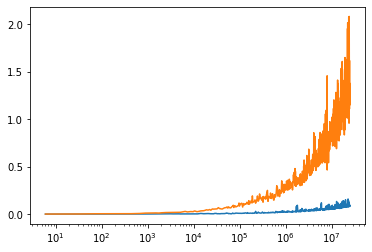

In [49]:
plt.plot(N, Time1, N, Time2)
plt.xscale("log")
plt.show()

# Exercise 7
Implement Pollard’s $\rho$ algorithm for both factoring and discrete logarithms.